The elbow method is a heuristic used in determining the optimal number of clusters in a k-means clustering algorithm. It is called the elbow method because it involves plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. This method is widely used because of its simplicity and effectiveness in practice.

The steps to create the elbow plot are provided below:

1. Run the k-means algorithm using your data for different k (say, 1-25).

2. For each k, calculate the sum of squared distances from each point to its assigned centroid. This metric is also known as the inertia of the k-means.

3. Plot SSE as a function of the number of clusters. The plot typically shows a rapid decrease in SSE as k increases initially because adding more clusters will naturally improve the fit.

4. As k continues to increase, the improvements in SSE will start to diminish. At some point, the gain in SSE reduction becomes marginal, creating an "elbow" in the plot. This point is considered to be a good trade-off between the complexity of the model (number of clusters) and the fit of the model. The idea is that adding more clusters beyond this point doesn’t provide substantial improvement in fitting the model to the data.


The elbow method provides a simple and intuitive visualization to choose the best k, and it often works well in practice to find a reasonable number of clusters if the data has a clear grouping.

However, there are some limitations. The exact elbow point can sometimes be ambiguous or subjective, especially if the curve is gradual. In some datasets, especially those with clusters of varying density or size, the elbow method might not yield a clear point of inflection. This is pretty common in real-world datasets. Also, minimizing SSE might not be the best approach for choosing k. Other techniques should be evaluated in parallel, such as silhouette analysis.  

<br>
In the following cells, the elbow method is demonstrated on dataset representing the sample mean and standard deviation of unemployment data for each of the 50 states: 

In [1]:

import pandas as pd

df = pd.read_csv("https://gist.githubusercontent.com/jtrive84/ea0f275a9ef010415392189e64c71fc3/raw/4bb56a71c5b597c16513c48183dde799ddf9ec51/unemp.csv")

df.head(10)

,state,mean,stddev
0,AL,6.644952,2.527530
1,AK,8.033173,1.464966
2,AZ,6.120673,1.743672
3,AR,6.474038,1.488008
4,CA,7.204087,1.833834
5,CO,5.383654,1.394852
6,CT,5.181731,1.630996
7,DE,5.185817,1.868010
8,FL,6.227163,1.863281
9,GA,5.685337,1.466855


In [2]:

import warnings
from sklearn.cluster import KMeans

warnings.filterwarnings("ignore")

# Use mean and stddev columns for clustering.
X = df[["mean", "stddev"]].values

# Compute SSE for each k. 
n_clust = range(1, 26)

results = []

for k in n_clust:

    kmeans = KMeans(n_clusters=k, random_state=516, n_init="auto")
    grps = kmeans.fit_predict(X)
    results.append((k, kmeans.inertia_))

results


[(1, 71.48395739420056),
 (2, 27.89336983415545),
 (3, 20.24188288137045),
 (4, 12.626365462154586),
 (5, 8.68912965898914),
 (6, 6.459331517502614),
 (7, 5.553744900882928),
 (8, 4.267127391718113),
 (9, 3.4187536239865084),
 (10, 3.066194952112686),
 (11, 2.695955805444958),
 (12, 2.3218932453872867),
 (13, 2.1421618770145803),
 (14, 2.0290844649980366),
 (15, 1.8714834948645003),
 (16, 1.7848062391719266),
 (17, 1.588261705328375),
 (18, 1.4404492654991405),
 (19, 1.2530374848818748),
 (20, 1.1906452777121082),
 (21, 0.9542369194221477),
 (22, 0.8924547058739023),
 (23, 0.7465084872875154),
 (24, 0.6827132125717246),
 (25, 0.5324000984155649)]

<br>

We can then plot SSE as a function of the number of clusters:

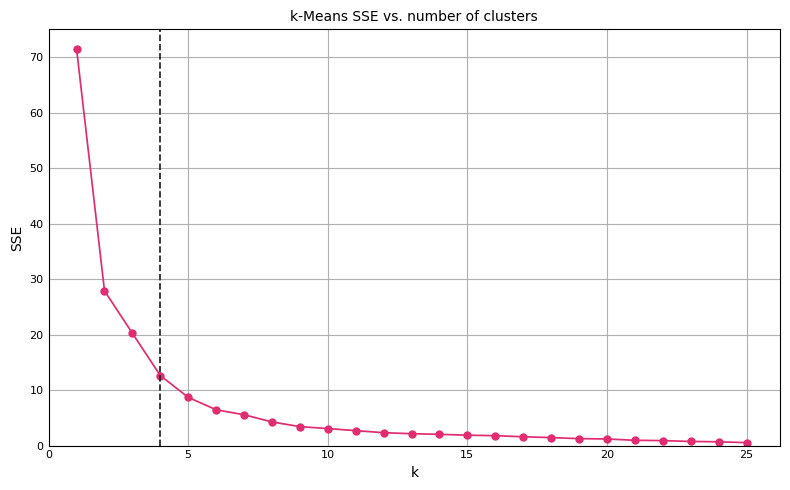

In [3]:

# Generate elbow plot.
import matplotlib as mpl
import matplotlib.pyplot as plt

xx, yy = zip(*results)

fig, ax = plt.subplots(figsize=(8, 5), tight_layout=True)
ax.set_title("k-Means SSE vs. number of clusters", fontsize=10)
ax.plot(xx, yy, color="#E02C70", linestyle="-", linewidth=1.25, markersize=5, marker="o")
ax.axvline(x=4., linewidth=1.25, color="#222222", linestyle="--")
ax.set_xlabel("k", fontsize=10)
ax.set_ylabel("SSE", fontsize=10)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.tick_params(axis="x", which="major", direction="in", labelsize=8)
ax.tick_params(axis="y", which="major", direction="in", labelsize=8)
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")
ax.grid(True)

plt.show()


Although subjective, selecting k=4 is reasonable (dashed vertical line). k=5 could also be justified, but there is little benefit using a k beyond 5 as SSE only marginally decreases. 

Finally, we can plot the cluster assignments using the optimal k:


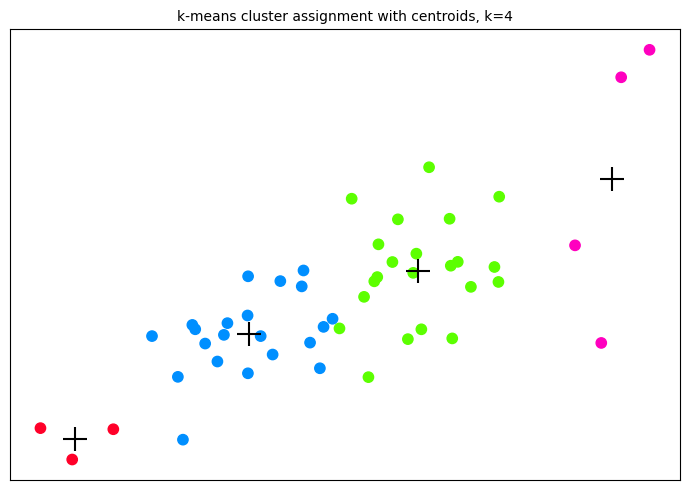

In [4]:

kmeans = KMeans(n_clusters=4, random_state=516,  n_init="auto")
kmeans.fit(X)
centroids = kmeans.cluster_centers_
kclust = kmeans.labels_


fig, ax = plt.subplots(figsize=(7, 5), tight_layout=True)
ax.set_title("k-means cluster assignment with centroids, k=4", fontsize=10, weight="normal")
ax.scatter(X[:, 0], X[:, 1], c=kclust, s=55, alpha=1, marker="o", cmap="gist_rainbow")

# Plot centroids as crosses.
ax.scatter(centroids[:, 0], centroids[:, 1], s=300, marker="+", c="#000000")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()
